In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (accuracy_score, confusion_matrix,classification_report)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import warnings
warnings.filterwarnings("ignore")

# IMPORT DATASET

In [2]:
social=pd.read_csv("social.csv")
social

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
social.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
social.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [5]:
social.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [6]:
social.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [8]:
social.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [10]:
social.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

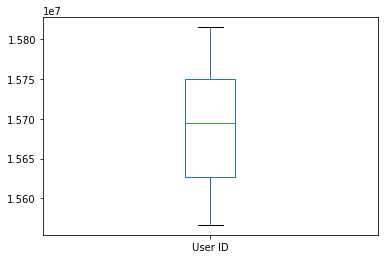

In [11]:
social['User ID'].plot.box()

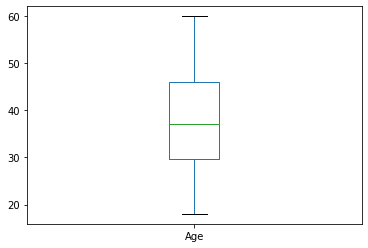

In [13]:
social['Age'].plot.box()

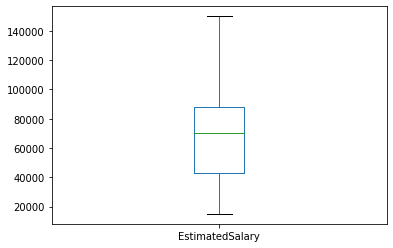

In [15]:
social['EstimatedSalary'].plot.box()

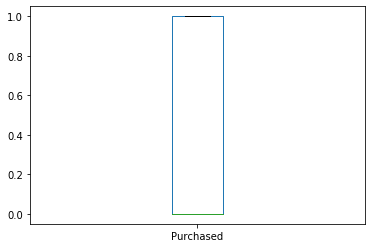

In [16]:
social['Purchased'].plot.box()

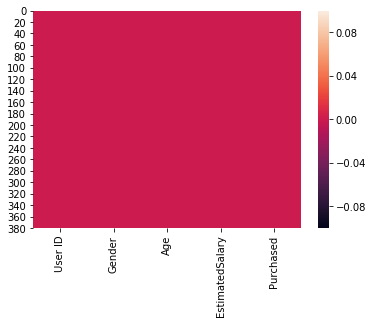

In [17]:
sns.heatmap(social.isnull())

# Visualization

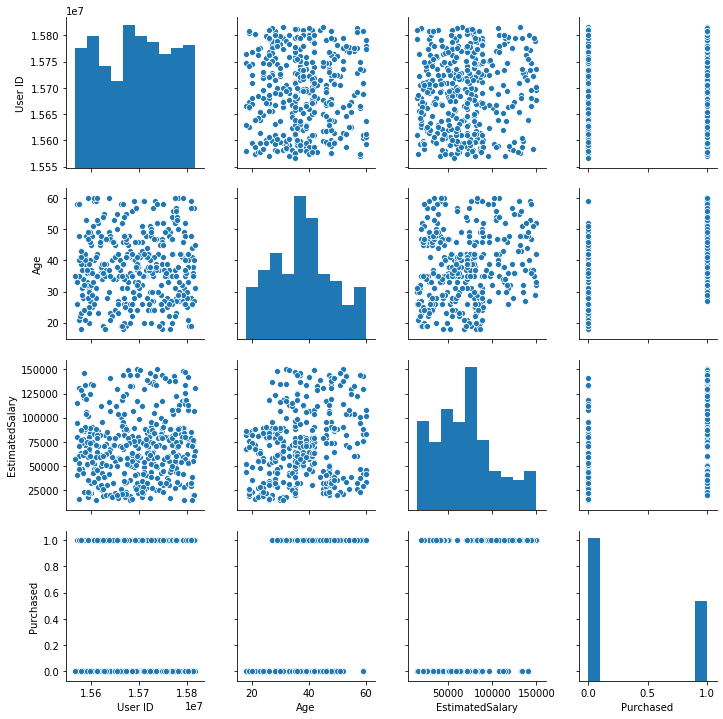

In [18]:
sns.pairplot(social)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F9928067C8>,
      dtype=object)

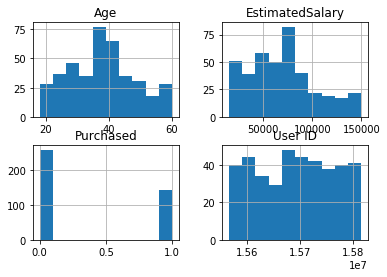

In [19]:
social.hist()

In [21]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F992806B08>,
      dtype=object)

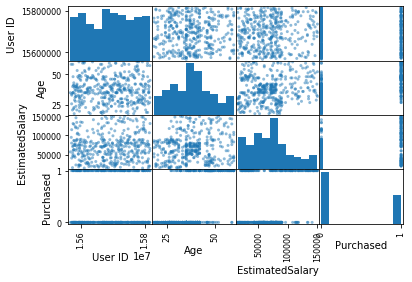

In [22]:
scatter_matrix(social)

# SPLITTING DATA INTO X AND Y FOR TRAINING AND TESTING

In [38]:
x=social.drop("Purchased",axis=1)

In [42]:
x

,User ID,Age,EstimatedSalary
0,15624510,19,19000
1,15810944,35,20000
2,15668575,26,43000
3,15603246,27,57000
4,15804002,19,76000
...,...,...,...
395,15691863,46,41000
396,15706071,51,23000
397,15654296,50,20000
398,15755018,36,33000


In [43]:
y=social['Purchased']
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.21,random_state=42)

In [45]:
x_train.shape

(316, 3)

In [46]:
y_train.shape

(316,)

In [47]:
x_test.shape

(84, 3)

In [48]:
y_test.shape

(84,)

# Applying Model and Algorithms using cross validation score

In [49]:
mnb=MultinomialNB()

score=cross_val_score(mnb,x,y,cv=5)
print("Score:",score)

print('Mean scores:',score.mean())
print('Standard Deviation',score.std())

y_pred=cross_val_predict(mnb,x,y,cv=5)
print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

Score: [0.62962963 0.7037037  0.7125     0.6835443  0.56962025]
Mean scores: 0.6597995780590717
Standard Deviation 0.05350000962323058
Y Prediction values
[0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0
 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1
 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1
 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0
 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1
 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1
 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 0
 0 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0
 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


array([[172,  85],
       [ 51,  92]], dtype=int64)

In [54]:
#scoring parameters for classification
#scoring=['accuracy','f1','f1_micro','f1_macro','roc_auc']
# scoring parameters for regression
#scoring=['r2','neg_mean_squarred_value','explained_variance']

sv=SVC()
score=cross_val_score(sv,x,y,cv=5,scoring='accuracy')

print('accuracy Score=',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred=cross_val_predict(sv,x,y,cv=5)
print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

accuracy Score= [0.64197531 0.64197531 0.6375     0.64556962 0.64556962]
Mean Scores 0.6425179715580559
Standard Deviation 0.002979735698183763
Y Prediction values
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


0.6425

In [51]:
dtc=DecisionTreeClassifier(criterion='gini')
score=cross_val_score(dtc,x,y,cv=5,scoring='f1_macro')

print('F1-Score=',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred=cross_val_predict(dtc,x,y,cv=5)
print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

F1-Score= [0.67857143 0.87819549 0.84482455 0.76363032 0.77560568]
Mean Scores 0.7881654926492938
Standard Deviation 0.06940638443811542
Y Prediction values
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0
 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1
 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0
 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1
 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1]


0.8125

In [53]:
lg=LogisticRegression()
score=cross_val_score(lg,x,y,cv=5,scoring='f1_macro')

print('F1-Score=',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred=cross_val_predict(lg,x,y,cv=5)
print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)


F1-Score= [0.77520814 0.82642857 0.65566714 0.74800638 0.47533207]
Mean Scores 0.6961284609684766
Standard Deviation 0.12354043715815279
Y Prediction values
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0
 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0
 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


0.77